# __`Day 12 Study About Random Forest Algorithm `__

# __Random Forest__

Random Forest is a `supervised learning algorithm`. Like you can already see from it’s name, it creates a forest and makes it somehow random. `The „forest“ it builds, is an ensemble of Decision Trees`, most of the time trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

To say it in simple words: __Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.__

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score , f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error , r2_score 
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [2]:
# load the data
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# encode features which are categorical or object using for loop
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        df[col] = le.fit_transform(df[col])
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [4]:
# split the data into X and y for classification
X = df.drop('sex', axis = 1)
y = df['sex']

# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# create, train and predict the mode
model_cl = RandomForestClassifier(n_estimators=200, random_state=42)
model_cl.fit(X_train, y_train)
y_pred = model_cl.predict(X_test)

#evaluate the model
print('accuracy score: ', accuracy_score(y_test, y_pred))
print('confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('classification report:\n', classification_report(y_test, y_pred))

accuracy score:  0.6122448979591837
confusion matrix:
 [[ 7 12]
 [ 7 23]]
classification report:
               precision    recall  f1-score   support

           0       0.50      0.37      0.42        19
           1       0.66      0.77      0.71        30

    accuracy                           0.61        49
   macro avg       0.58      0.57      0.57        49
weighted avg       0.60      0.61      0.60        49



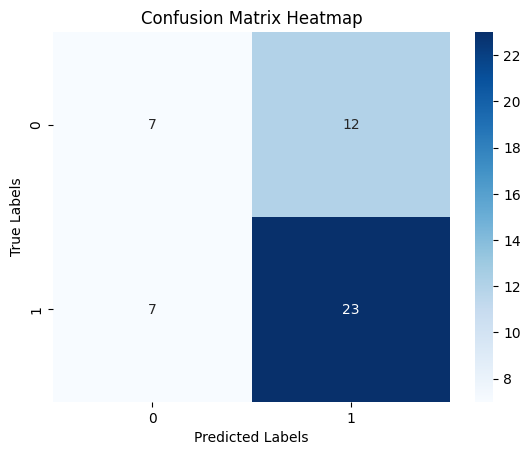

In [6]:
# Plot the heatmap use confusion matric
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap using confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()



In [28]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,1,3,1,2
1,10.34,1.66,0,1,3,1,3
2,21.01,3.50,0,1,3,1,3
3,23.68,3.31,0,1,3,1,2
4,24.59,3.61,1,1,3,1,4


In [27]:
# Predict the specific Value
model_cl.predict([[16.99,1,1,3,1,2]])

c:\Users\tayya\.conda\envs\python_ml\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

#   __`Saved The Mode Using Pickle`__

In [25]:
# Saved The Model
import pickle
pickle.dump(model_cl , open("E:\Data_Sacience\\101-ML_Course\\Saved_Model_ML\\Random_Forest_Classifer.pk1" , 'wb'))

# __`Random Forest For Regressor`__

In [8]:
# Load The Dataset of Tips
df1 = sns.load_dataset('tips')
df1.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
# Encode The data which is datatype Object or Categorical using for loop
# encode features which are categorical or object using for loop
le = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object' or df[i].dtype == 'category':
        df[i] = le.fit_transform(df[i])
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,1,3,1,2
1,10.34,1.66,0,1,3,1,3
2,21.01,3.50,0,1,3,1,3
3,23.68,3.31,0,1,3,1,2
4,24.59,3.61,1,1,3,1,4


In [12]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,1,3,1,2
1,10.34,1.66,0,1,3,1,3
2,21.01,3.50,0,1,3,1,3
3,23.68,3.31,0,1,3,1,2
4,24.59,3.61,1,1,3,1,4


In [13]:
# Make  The Data in X and y form our dataset
X = df.drop('tip', axis = 1)
y = df['tip']


Mean Absolute Error: 0.751361224489796
Mean Squared Error: 0.8998375740816337
R2 Score: 0.2801134382122604


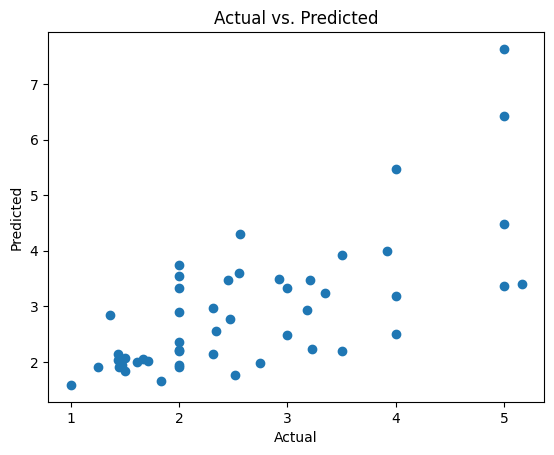

In [20]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Call The Model And Fit the Model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict 
y_pred = model.predict(X_test)

# Evaluate The Model for regression
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
# Plotting
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [21]:
# Predict the Specific value
model.predict([[16.99,1,1,3,1,2]])

c:\Users\tayya\.conda\envs\python_ml\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2.0081])

#   __`Saved The Mode Using Pickle`__

In [26]:
# Saved The Model
import pickle
pickle.dump(model , open("E:\Data_Sacience\\101-ML_Course\\Saved_Model_ML\\Random_Forest_Regressor.pk2" , 'wb'))